In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 


Préparation des données

In [91]:
data=pd.read_csv("data\german_credit_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\g'
<>:1: SyntaxWarning: invalid escape sequence '\g'
C:\Users\MIDEHOUIN\AppData\Local\Temp\ipykernel_4968\2120753703.py:1: SyntaxWarning: invalid escape sequence '\g'
  data=pd.read_csv("data\german_credit_data.csv")


In [92]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [93]:
data=data.drop(columns="Unnamed: 0")
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [95]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [96]:
var_categorielle=data.select_dtypes(include=("object", "category")).columns
var_categorielle

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

In [97]:
data[var_categorielle].describe()

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [98]:
for colonne in var_categorielle:
    print(f"Distribution de {colonne} en pourcentage :")
    print(data[colonne].value_counts())
    print("\n")

Distribution de Sex en pourcentage :
Sex
male      690
female    310
Name: count, dtype: int64


Distribution de Housing en pourcentage :
Housing
own     713
rent    179
free    108
Name: count, dtype: int64


Distribution de Saving accounts en pourcentage :
Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


Distribution de Checking account en pourcentage :
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


Distribution de Purpose en pourcentage :
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


Distribution de Risk en pourcentage :
Risk
good    700
bad     300
Name: count, dtype: int64




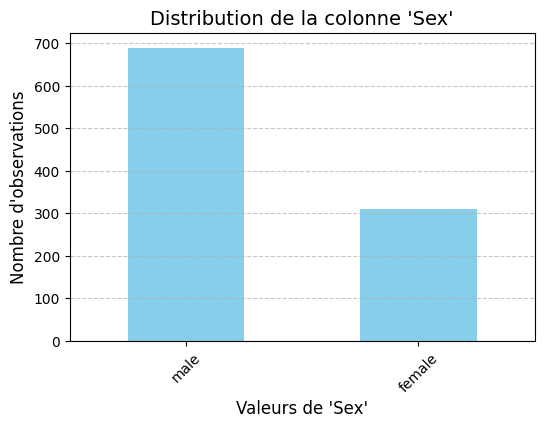

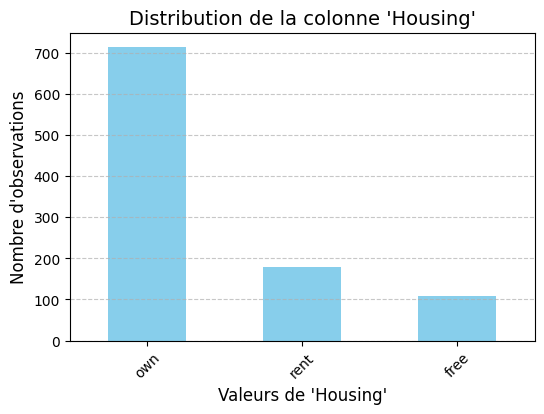

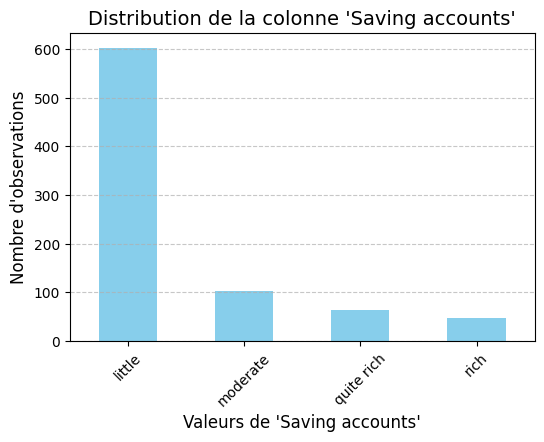

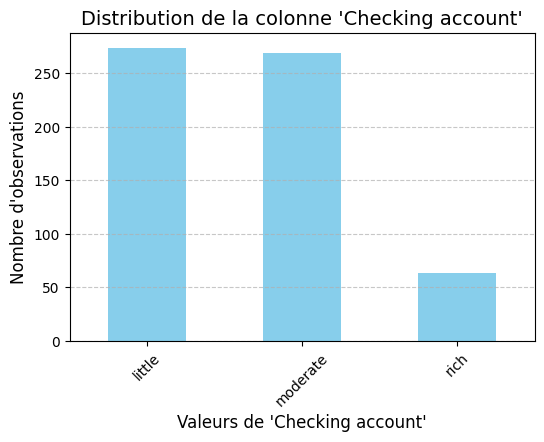

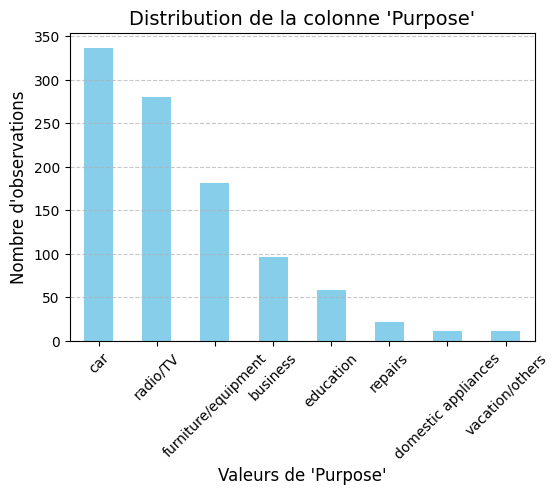

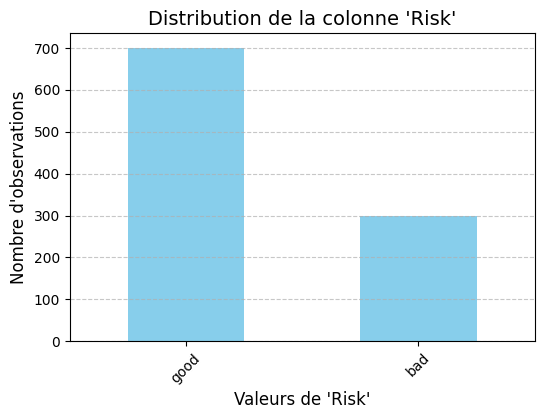

In [99]:
# Identifier les colonnes catégorielles
cat_cols = [col for col in data.columns if data[col].dtypes == 'O']

# Création des graphiques pour chaque colonne catégorielle
for col in cat_cols:
    # Calcul des fréquences
    col_counts = data[col].value_counts()
    
    # Création du graphique
    plt.figure(figsize=(6, 4))
    col_counts.plot(kind='bar', color='skyblue')
    
    # Ajout des titres et labels
    plt.title(f"Distribution de la colonne '{col}'", fontsize=14)
    plt.xlabel(f"Valeurs de '{col}'", fontsize=12)
    plt.ylabel("Nombre d'observations", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Affichage du graphique
    plt.show()


Analyse numerique

In [100]:
var_numerique=data.select_dtypes(include=("float64","int64")).columns
var_numerique

Index(['Age', 'Job', 'Credit amount', 'Duration'], dtype='object')

In [101]:
data[var_numerique].describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


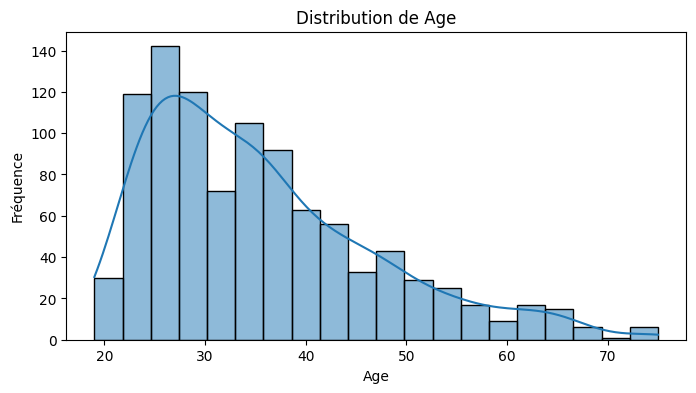

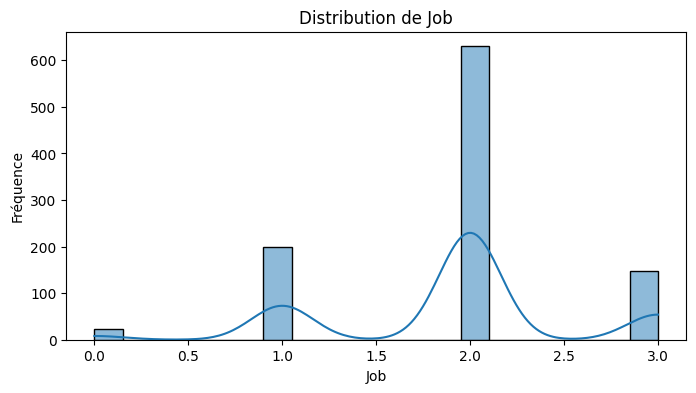

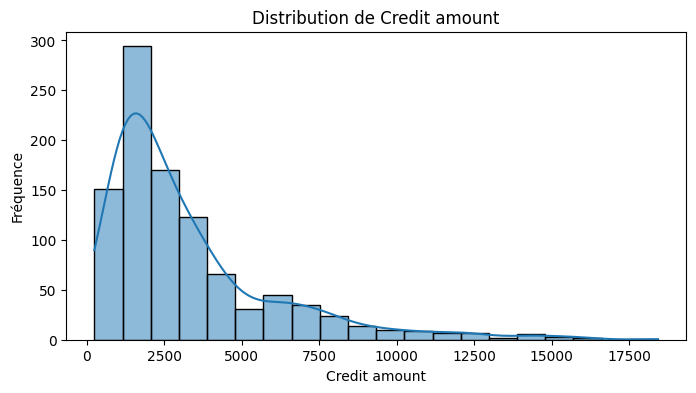

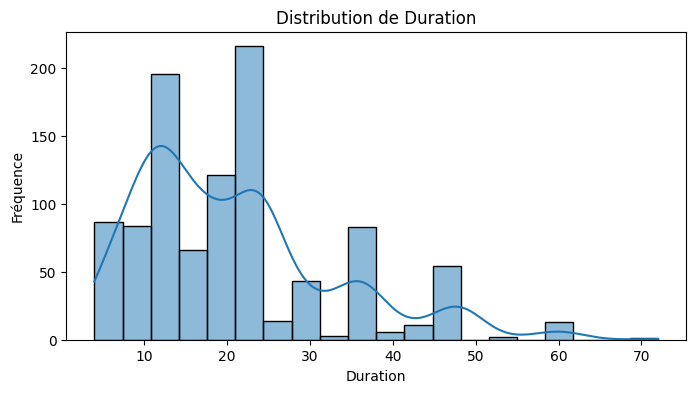

In [102]:
## Visualisons les distributions de chaque colonne numerique 

for col in var_numerique:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

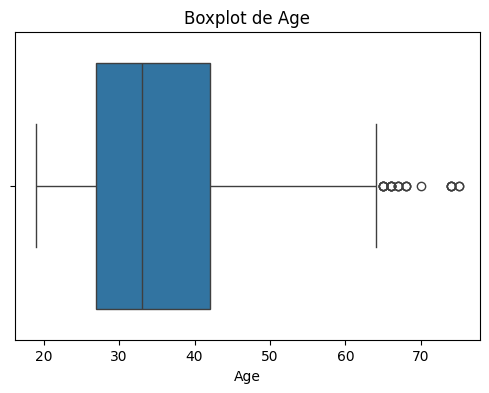

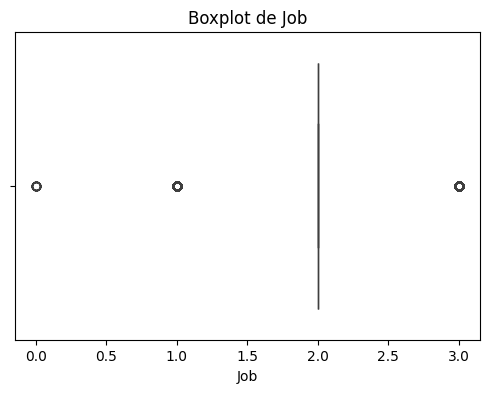

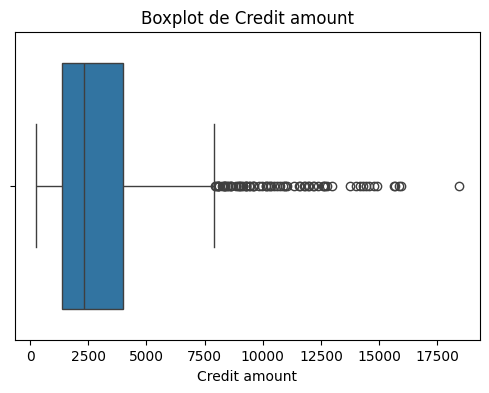

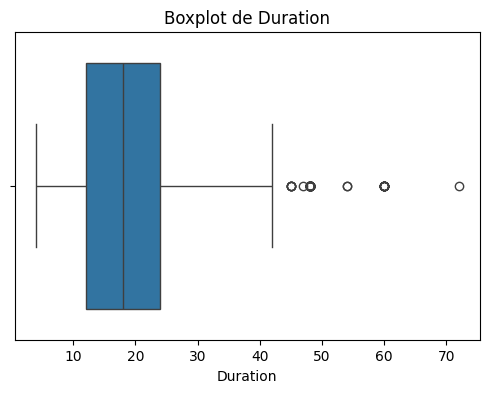

In [103]:
##La visualisation boxplot
for col in var_numerique:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()

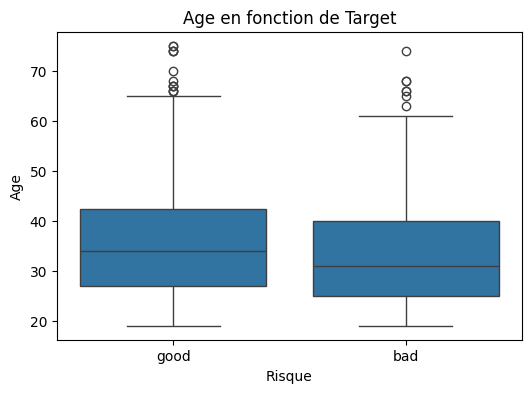

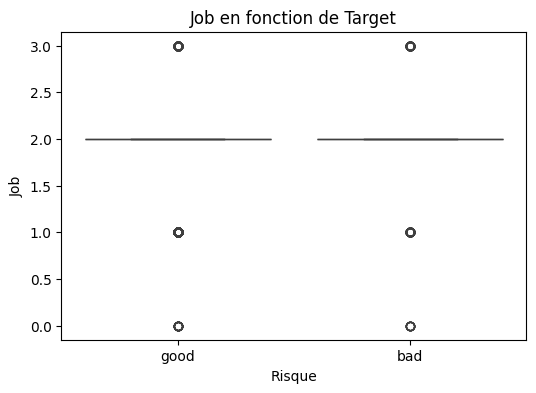

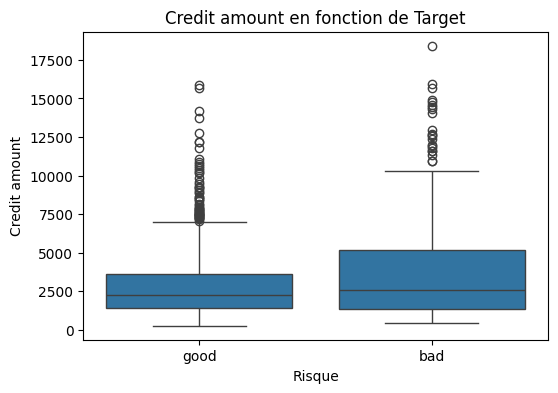

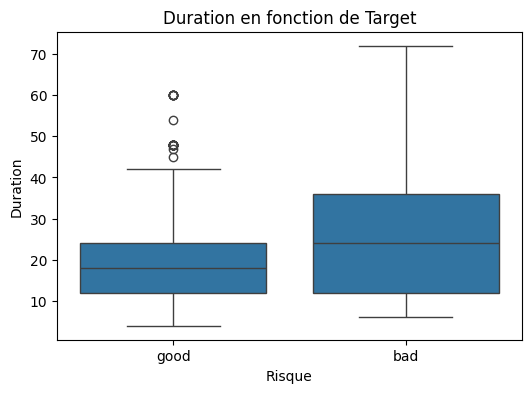

In [104]:
##Analyse  les relations entre les variables num et la cible 

for col in var_numerique:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data["Risk"], y=data[col])
    plt.title(f"{col} en fonction de Target")
    plt.xlabel("Risque")
    plt.ylabel(col)
    plt.show()

Distribution des variables catégoriques par rapport à la cible




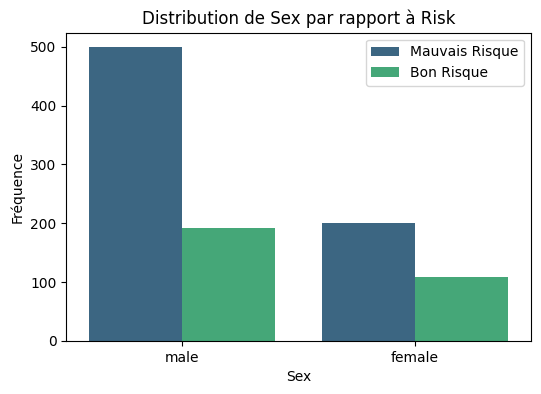

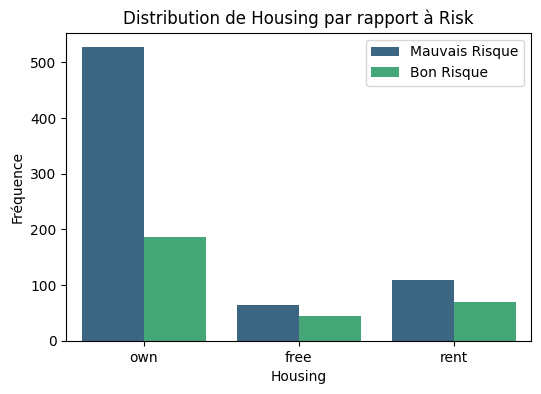

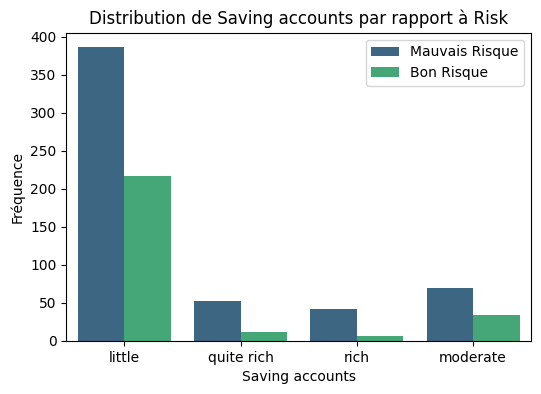

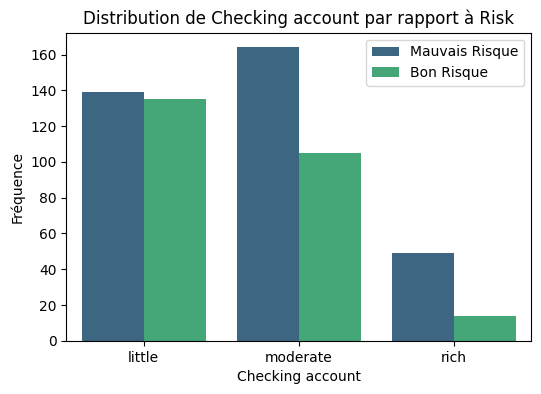

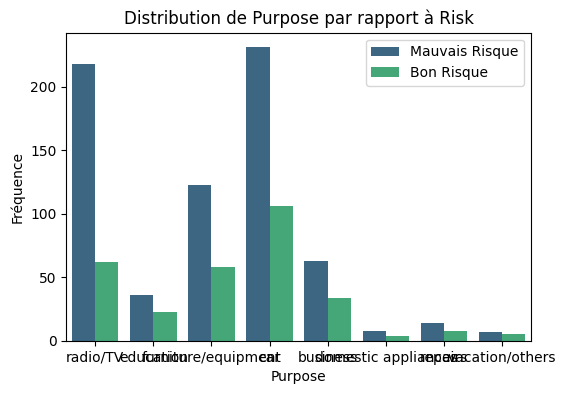

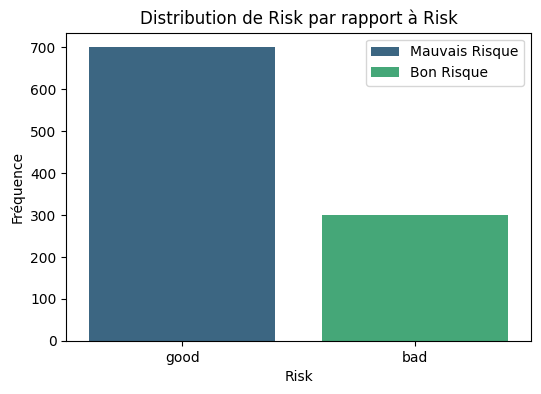

In [105]:
for colonne in var_categorielle:
 plt.figure(figsize=(6, 4))
 sns.countplot(data=data, x=colonne, hue='Risk', palette='viridis')
 plt.title(f'Distribution de {colonne} par rapport à Risk')
 plt.xlabel(colonne)
 plt.ylabel('Fréquence')
 plt.legend(['Mauvais Risque', 'Bon Risque'])
 plt.show()


Croisement entre les colonnes et la cible 'Risk'

In [106]:
var_categorielle=var_categorielle.drop("Risk")

In [107]:
 for colonne in var_categorielle:
    crosstab = pd.crosstab(data[colonne], data['Risk'], normalize='index') * 100
    print(f"Croisement entre {colonne} et la cible 'Risque':")
    display(crosstab.style.format("{:.2f}%").background_gradient(cmap='Blues'))
    print("\n")


Croisement entre Sex et la cible 'Risque':


Risk,bad,good
Sex,,
female,35.16%,64.84%
male,27.68%,72.32%




Croisement entre Housing et la cible 'Risque':


Risk,bad,good
Housing,,
free,40.74%,59.26%
own,26.09%,73.91%
rent,39.11%,60.89%




Croisement entre Saving accounts et la cible 'Risque':


Risk,bad,good
Saving accounts,,
little,35.99%,64.01%
moderate,33.01%,66.99%
quite rich,17.46%,82.54%
rich,12.50%,87.50%




Croisement entre Checking account et la cible 'Risque':


Risk,bad,good
Checking account,,
little,49.27%,50.73%
moderate,39.03%,60.97%
rich,22.22%,77.78%




Croisement entre Purpose et la cible 'Risque':


Risk,bad,good
Purpose,,
business,35.05%,64.95%
car,31.45%,68.55%
domestic appliances,33.33%,66.67%
education,38.98%,61.02%
furniture/equipment,32.04%,67.96%
radio/TV,22.14%,77.86%
repairs,36.36%,63.64%
vacation/others,41.67%,58.33%


les corrélations entre les variables

In [108]:
## Ecodage des variables binaires

data["Sex"] = data["Sex"].apply(lambda row:1 if row=="female" else 0)

In [109]:
data["Risk"] = data["Risk"].apply(lambda row:1 if row=="good" else 0)

In [110]:
## Encodage des variables categorielles restantes
remaining_var_cat= data[var_categorielle].nunique()[data[var_categorielle].nunique()> 2].keys().to_list()

In [112]:
remaining_var_cat

['Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [113]:
ncde_var_cat=pd.get_dummies(data=data[remaining_var_cat], columns=remaining_var_cat, drop_first=True)

In [114]:
data=pd.concat([data["Sex"], data["Risk"] ,ncde_var_cat, data[var_numerique]], axis=1)

In [61]:
data.head()

,Sex,Risk,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
0,0,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,67,2,1169,6
1,1,0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,22,2,5951,48
2,0,1,True,False,False,False,False,False,False,False,False,True,False,False,False,False,49,1,2096,12
3,0,1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,45,2,7882,42
4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,53,2,4870,24


In [115]:
data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))


C:\Users\MIDEHOUIN\AppData\Local\Temp\ipykernel_4968\1868506559.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [116]:
data.head()

,Sex,Risk,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age,Job,Credit amount,Duration
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,67,2,1169,6
1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,22,2,5951,48
2,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,49,1,2096,12
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,45,2,7882,42
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,53,2,4870,24
